Setup
==

In [ ]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette('husl')

In [2]:
DIR = "C:\\Users\\amatk\\OneDrive\\Dokumenty\\2_Tuebingen\\SoSe_25\\nlp-offensive-language-classifier\\results\\"
base_clean_metrics_path = DIR + "bert_original\\clean\\metrics.csv"
base_pert_metrics_path = DIR + "bert_original\\perturbed\\metrics.csv"
aug_clean_metrics_path = DIR + "bert_augmented\\clean\\metrics.csv"
aug_pert_metrics_path = DIR + "bert_augmented\\perturbed\\metrics.csv"

In [3]:
base_clean_df = pd.read_csv(base_clean_metrics_path)
base_pert_df = pd.read_csv(base_pert_metrics_path)
aug_clean_df = pd.read_csv(aug_clean_metrics_path)
aug_pert_df =pd.read_csv(aug_pert_metrics_path)

Plot metrics
=

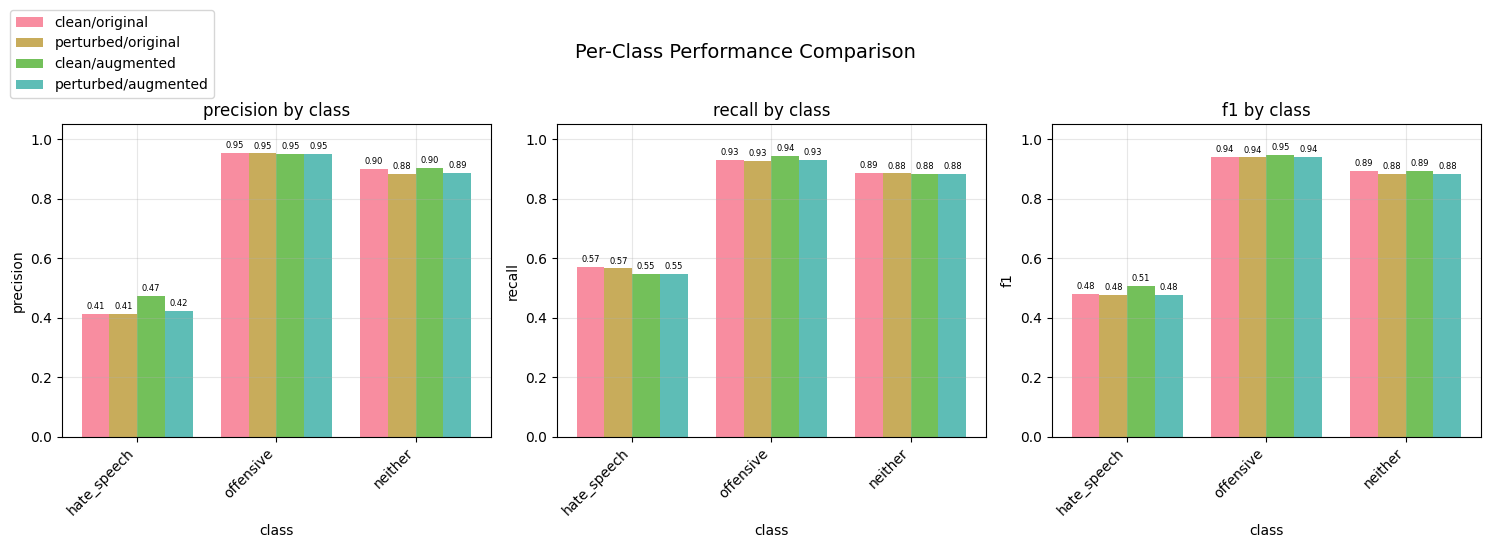

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_to_plot = ['precision', 'recall', 'f1']
for idx, metric in enumerate(metrics_to_plot):

    ax = axes[idx]
    classes = ['hate_speech', 'offensive', 'neither']

    # getting the values
    base_clean_values = [base_clean_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]
    base_pert_values = [base_pert_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]
    aug_clean_values = [aug_clean_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]
    aug_pert_values = [aug_pert_df[f"test_{cls}_{metric}"].iloc[0] for cls in classes]

    groups = [base_clean_values, base_pert_values, aug_clean_values, aug_pert_values]
    labels = ["clean/original", "perturbed/original", "clean/augmented", "perturbed/augmented"]

    x = np.arange(len(classes))
    width = 0.8 / len(groups)

    bars = []
    for i, (vals, label) in enumerate(zip(groups, labels)):
        offset = (i - (len(groups)-1)/2) * width #to make sure the bars do not overlap
        bars.append(ax.bar(x+offset, vals, width, label=label, alpha=0.8))

    ax.set_xlabel("class")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} by class")
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_ylim([0, 1.05])
    ax.grid(True, alpha=0.3)

    for elem in bars: #add numerical labels above the bars 
        for bar in elem:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=6)


handles, labels = axes[0].get_legend_handles_labels() 
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.15, 1.1)) 
plt.suptitle('Per-Class Performance Comparison', fontsize=14, y=1.02)
fig.savefig("../results/stage1_per_class_comparison.png", dpi=200, bbox_inches="tight")
plt.tight_layout()
fig.savefig("per_class_comparison.png", bbox_inches="tight")
plt.show()   


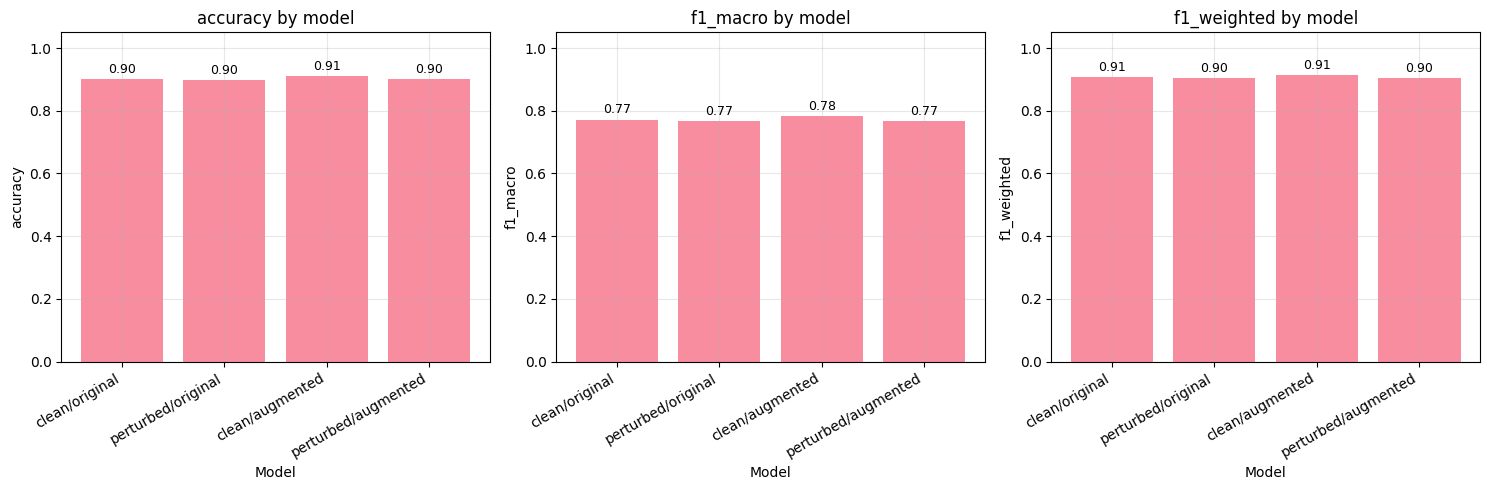

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics_to_plot = ['accuracy', 'f1_macro', 'f1_weighted']

for idx, metric in enumerate(metrics_to_plot):

    ax = axes[idx]

    # getting the values
    values = [
        base_clean_df[f"test_{metric}"].iloc[0],
        base_pert_df[f"test_{metric}"].iloc[0],
        aug_clean_df[f"test_{metric}"].iloc[0],
        aug_pert_df[f"test_{metric}"].iloc[0]]

    x = np.arange(len(labels)) #labels from cell above 

    bars = ax.bar(x, values, alpha=0.8)

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)
      
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=30, ha="right")
    ax.set_ylabel(metric)
    ax.set_xlabel("Model")
    ax.set_title(f"{metric} by model")
    ax.set_ylim([0, 1.05])
    ax.grid(True, alpha=0.3)

fig.tight_layout()
fig.savefig("general_evals.png", bbox_inches="tight")
plt.show()

Create confusion matrices
=

In [5]:
test_path_aug = DIR + "bert_augmented\\clean\\test_predictions.csv"
pert_test_path_aug = DIR + "bert_augmented\\perturbed\\test_predictions.csv"
test_path_orig = DIR + "bert_original\\clean\\test_predictions.csv"
pert_test_path_orig = DIR + "bert_original\\perturbed\\test_predictions.csv"

In [6]:
test_aug = pd.read_csv(test_path_aug)
pert_test_aug = pd.read_csv(pert_test_path_aug)
test_orig = pd.read_csv(test_path_orig)
pert_test_orig = pd.read_csv(pert_test_path_orig)

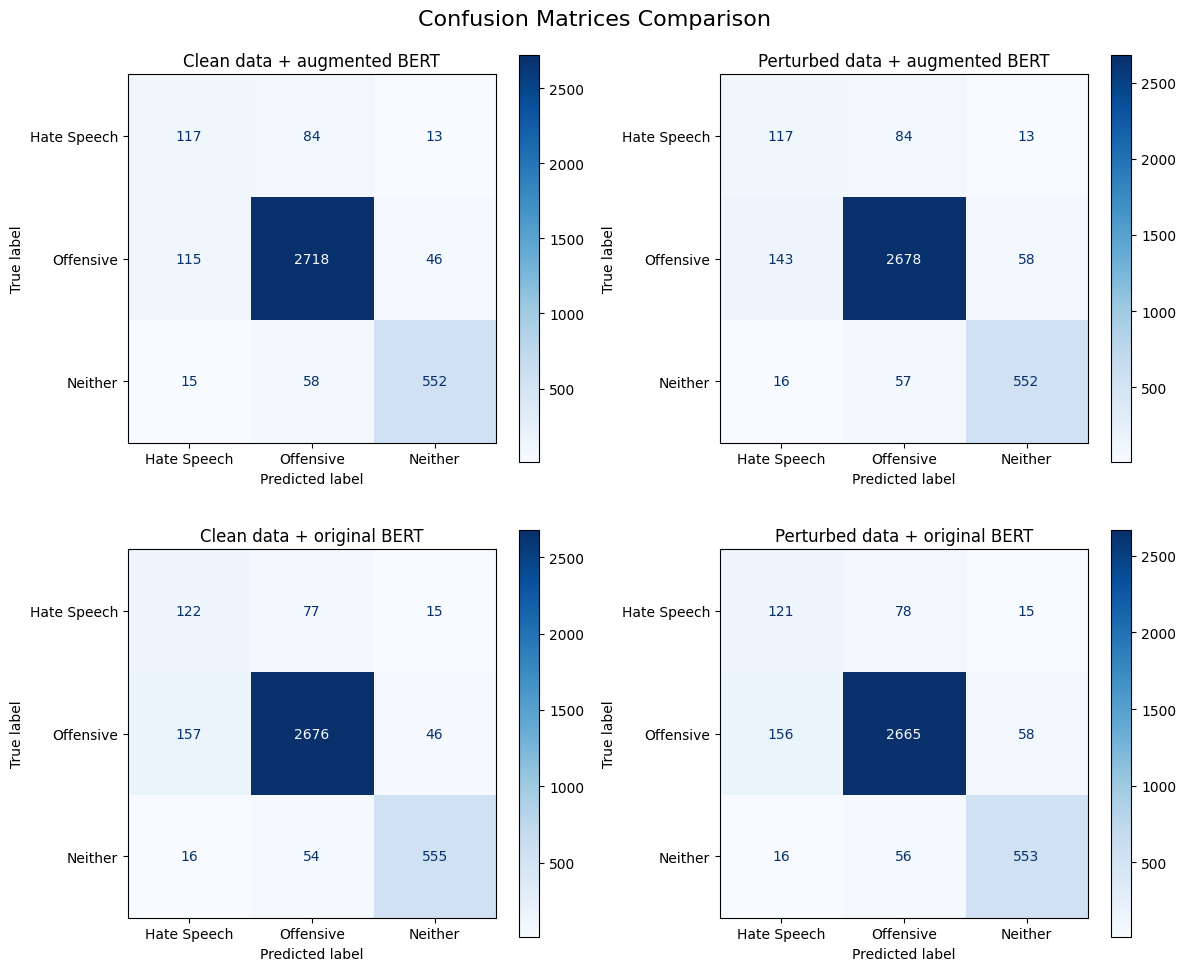

In [13]:
#get the true and predicted labels in a list
true_labels_list = [test_aug["true_label"], pert_test_aug["true_label"], test_orig["true_label"], pert_test_orig["true_label"]]
pred_labels_list = [test_aug["predicted_label"], pert_test_aug["predicted_label"], test_orig["predicted_label"], pert_test_orig["predicted_label"]]
titles = ["Clean data + augmented BERT", "Perturbed data + augmented BERT", "Clean data + original BERT", "Perturbed data + original BERT"]

# Create a 2x2 grid for plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Shared title
fig.suptitle("Confusion Matrices Comparison", fontsize=16)

for ax, true, pred, title in zip(axs.ravel(), true_labels_list, pred_labels_list, titles):
    disp = ConfusionMatrixDisplay.from_predictions(true, pred, cmap="Blues",ax=ax)
    ax.set_title(title)
    ax.set_xticklabels(["Hate Speech", "Offensive", "Neither"])
    ax.set_yticklabels(["Hate Speech", "Offensive", "Neither"])

plt.tight_layout()
plt.subplots_adjust()
# plt.savefig("bert_eval_confusion_matrices.png", bbox_inches="tight")
plt.show()
